In [1]:
import pandas as pd
import mariadb
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import *
import numpy as np
import bisect
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

conn  = mariadb.connect(
    user='team3', 
    password='dbdb', 
    database='team3db', 
    host='localhost',
    port=3306
)

# 위 커넥션 정보와 동일하게 입력
engine = create_engine("mysql://{user}:{pw}@{host}/{db}".format(user='team3', pw='dbdb',host='localhost', db='team3db'))

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='whitegrid')

In [3]:
select_sql = "SELECT * FROM train2"
df = pd.read_sql_query(select_sql, engine,index_col='index')
df.reset_index(inplace=True,drop=True)
df.drop(columns='SAMPLE_ID',inplace=True)
df

,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,...,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
0,SG,GIW5,Container,30.881018,2018-12-17 21:29,Z618338,30.0,24,24300,10.0,...,180.0,CQSB78,Panama,NaN,NaN,NaN,NaN,5,0.002615,3.450000
1,IN,UJM2,Bulk,0.000000,2014-09-23 6:59,X886125,30.0,13,35900,10.0,...,180.0,SPNO34,Marshall Islands,NaN,NaN,NaN,NaN,12,0.000217,0.000000
2,CN,EUC8,Container,0.000000,2015-02-03 22:00,T674582,50.0,12,146000,30.0,...,370.0,FNPK22,Malta,NaN,NaN,NaN,NaN,6,0.001614,0.000000
3,JP,ZAG4,Container,0.000000,2020-01-17 4:02,Y847238,20.0,18,6910,10.0,...,120.0,PBZV77,Bahamas,-3.18,-1.61,6.7,2.629350,13,0.000356,0.000000
4,SG,GIW5,Container,27.037650,2020-01-26 7:51,A872328,50.0,10,116000,20.0,...,300.0,GUCE76,Liberia,-0.33,-3.28,25.6,2.495953,15,0.002615,253.554444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391934,JP,QYY1,Container,0.000000,2017-06-06 5:02,Y375615,20.0,27,6820,10.0,...,110.0,KEJZ24,"China, People's Republic Of",NaN,NaN,NaN,NaN,14,0.000552,0.000000
391935,SG,GIW5,Bulk,5.884603,2019-10-16 0:36,K635567,10.0,12,3160,10.0,...,80.0,JLTM64,Vietnam,-0.66,0.97,27.3,1.253491,8,0.002615,144.061389
391936,US,QGN3,Bulk,70.660241,2021-03-23 22:35,J284147,30.0,8,60300,20.0,...,200.0,YERJ68,Singapore,-3.44,7.99,21.1,4.766257,18,0.000155,41.482222
391937,TW,JWI3,Container,9.448179,2015-01-08 7:15,J644215,30.0,29,23800,10.0,...,170.0,HCZK58,Comoros,NaN,NaN,NaN,NaN,15,0.000990,7.485278


In [4]:
df_temp = df.copy()

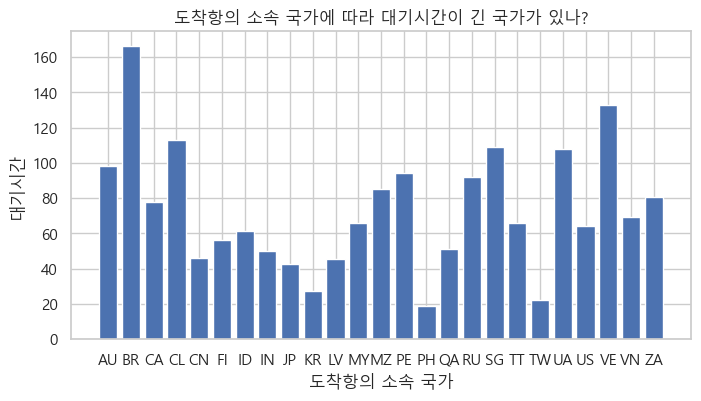

In [5]:
df_nation = df_temp.groupby('ARI_CO')['CI_HOUR'].mean()

# 인덱스 리스트로
label = df_nation.index
plt.figure(figsize=(8,4))

# 인덱스를 X, 평균 가격을 Y로 하는 막대 그래프 
plt.bar(label,df_nation)
plt.xlabel('도착항의 소속 국가')
plt.ylabel('대기시간')
plt.title('도착항의 소속 국가에 따라 대기시간이 긴 국가가 있나?')
plt.show()

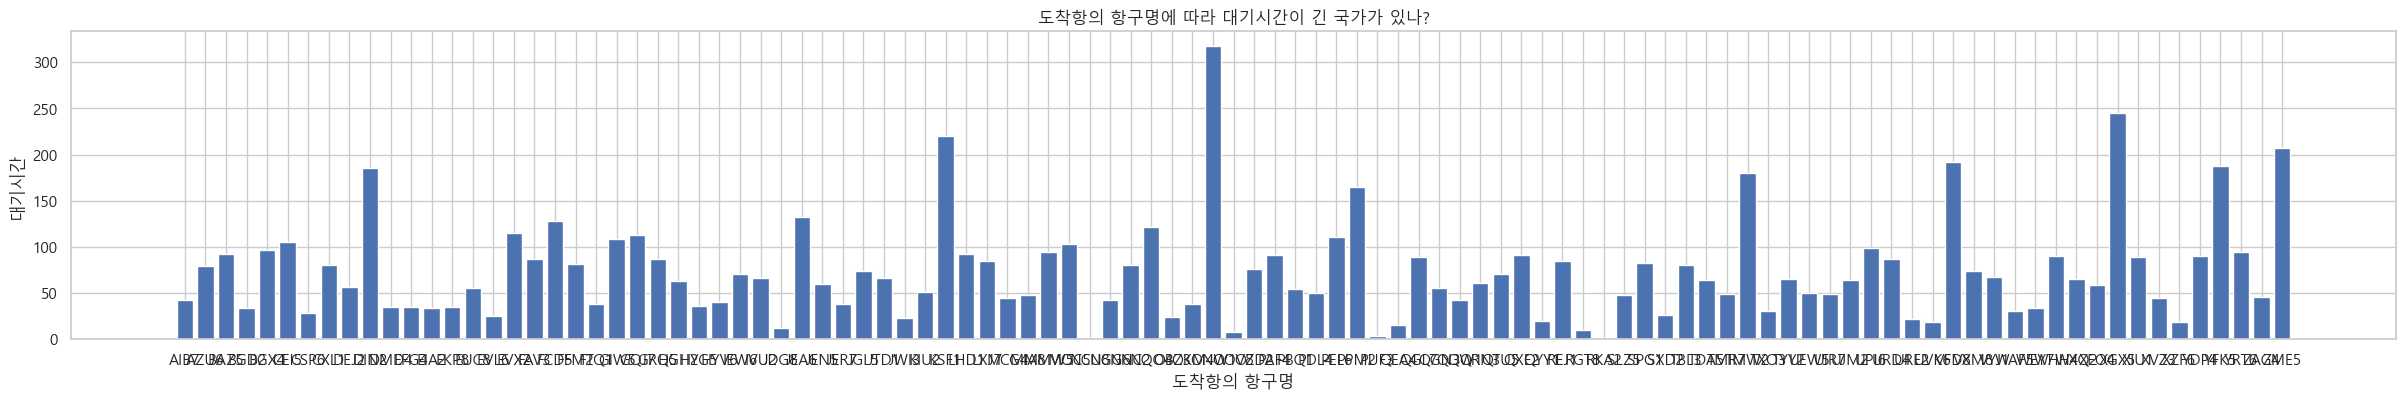

In [6]:
df_nation = df_temp.groupby('ARI_PO')['CI_HOUR'].mean()

# 인덱스 리스트로
label = df_nation.index
plt.figure(figsize=(30,4))

# 인덱스를 X, 평균 가격을 Y로 하는 막대 그래프 
plt.bar(label,df_nation)
plt.xlabel('도착항의 항구명')
plt.ylabel('대기시간')
plt.title('도착항의 항구명에 따라 대기시간이 긴 국가가 있나?')
plt.show()

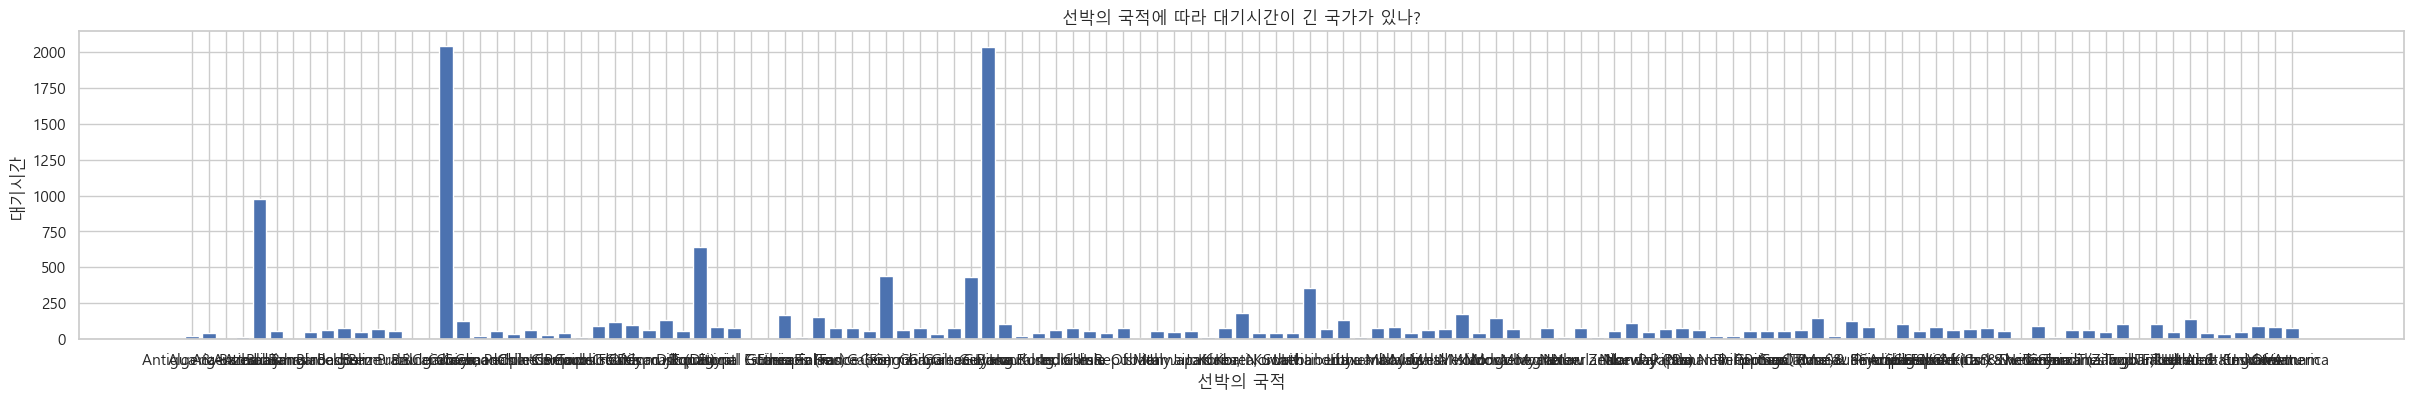

In [7]:
df_nation = df_temp.groupby('FLAG')['CI_HOUR'].mean()

# 인덱스 리스트로
label = df_nation.index
plt.figure(figsize=(30,4))

# 인덱스를 X, 평균 가격을 Y로 하는 막대 그래프 
plt.bar(label,df_nation)
plt.xlabel('선박의 국적')
plt.ylabel('대기시간')
plt.title('선박의 국적에 따라 대기시간이 긴 국가가 있나?')
plt.show()

In [8]:
df.columns

Index(['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'DIST', 'ATA', 'ID',
       'BREADTH', 'BUILT', 'DEADWEIGHT', 'DEPTH', 'DRAUGHT', 'GT', 'LENGTH',
       'SHIPMANAGER', 'FLAG', 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN',
       'ATA_LT', 'PORT_SIZE', 'CI_HOUR'],
      dtype='object')

# 범주형 변수

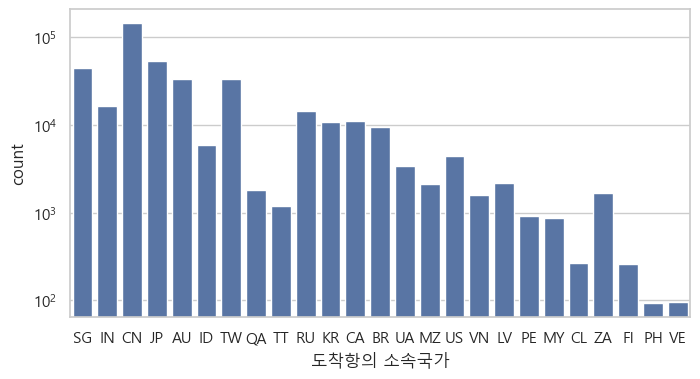

In [9]:
plt.figure(figsize=(8,4))

sns.countplot(x='ARI_CO',data=df)
plt.xlabel('도착항의 소속국가')
plt.yscale('log')

데이터에서 도착항의 소속국가별로 편차가 있음을 확인할 수 있다.

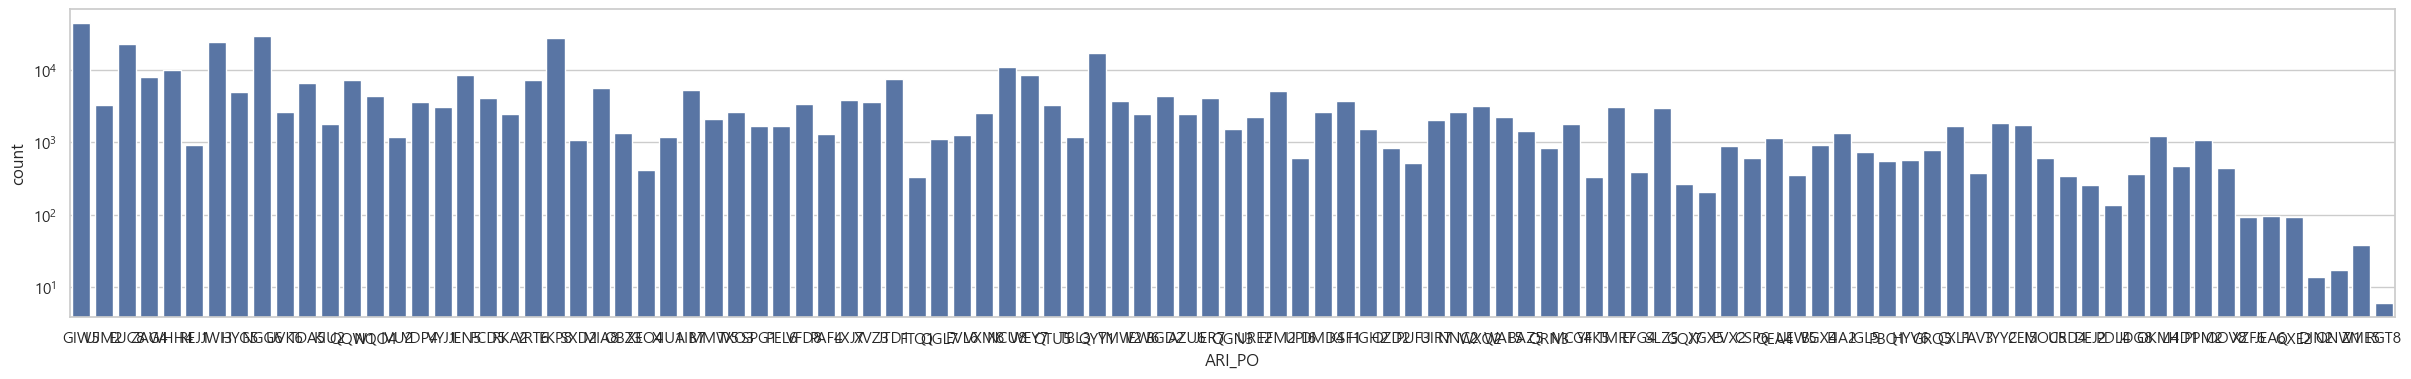

In [10]:
plt.figure(figsize=(30,4))

sns.countplot(x='ARI_PO',data=df)
plt.yscale('log')

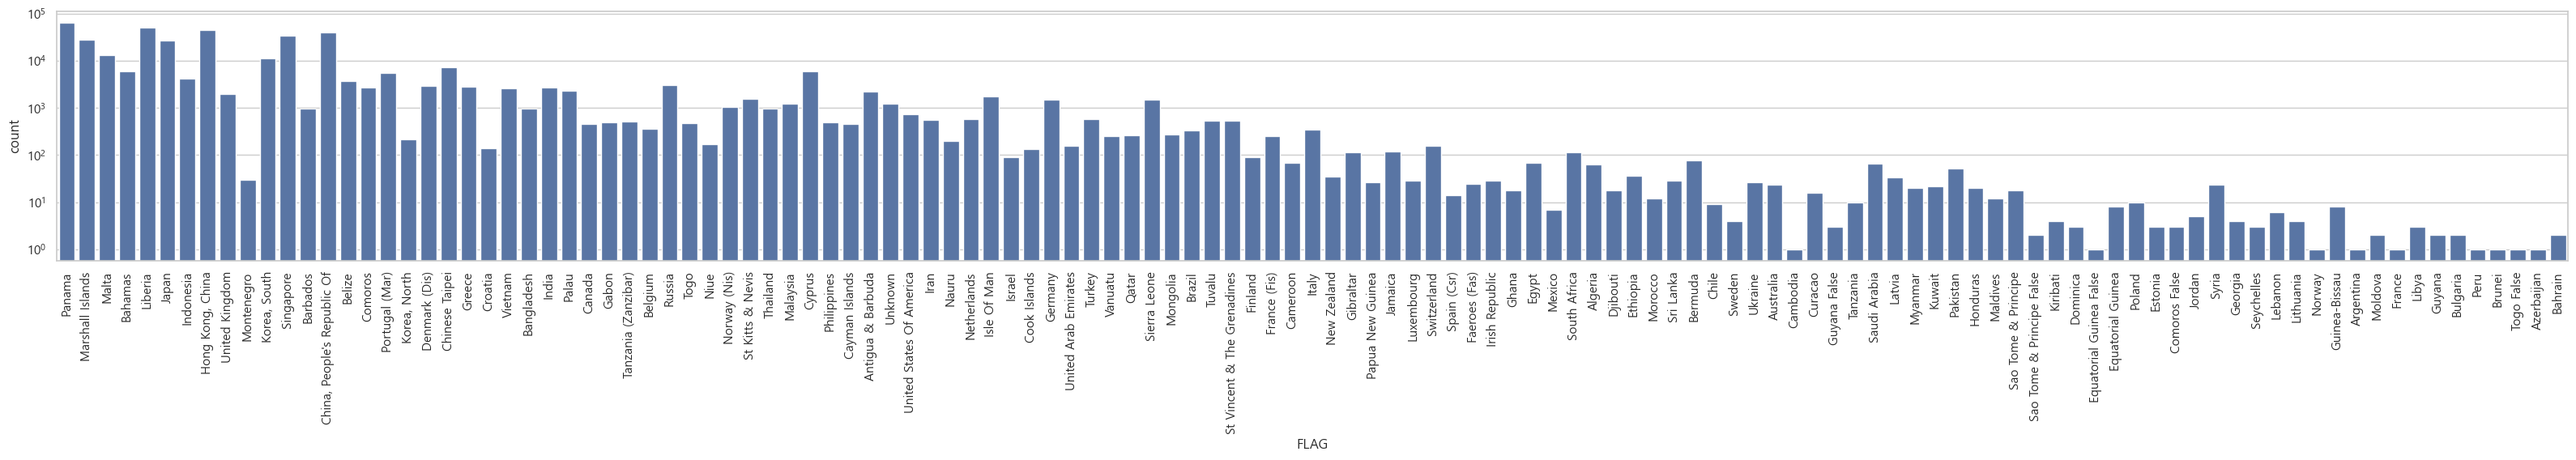

In [11]:
plt.figure(figsize=(40,4))

sns.countplot(x='FLAG',data=df)
plt.xticks(rotation=90)
plt.yscale('log')

<Axes: xlabel='SHIP_TYPE_CATEGORY', ylabel='CI_HOUR'>

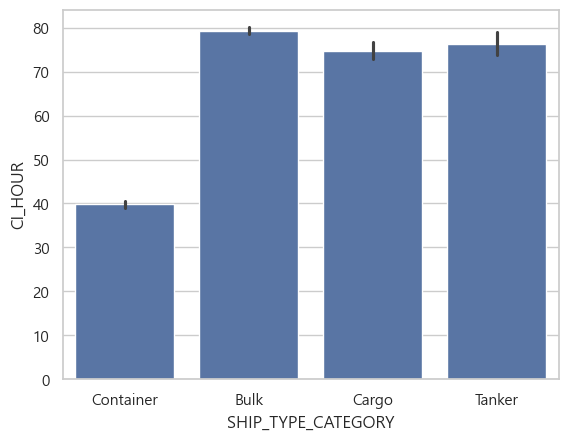

In [79]:
sns.barplot(x='SHIP_TYPE_CATEGORY',y='CI_HOUR',data=df)

<Axes: xlabel='ARI_CO', ylabel='CI_HOUR'>

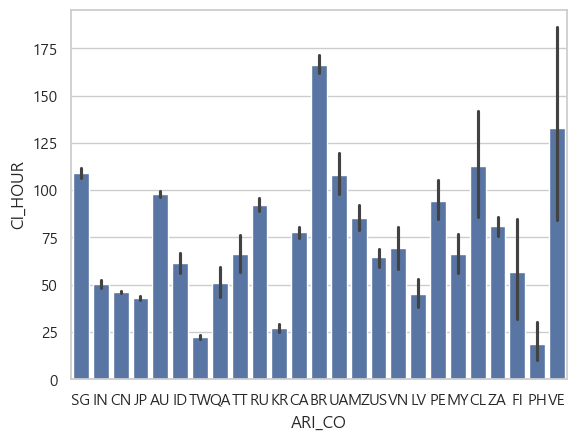

In [80]:
sns.barplot(x='ARI_CO',y='CI_HOUR',data=df)

<Axes: xlabel='CI_HOUR', ylabel='ARI_PO'>

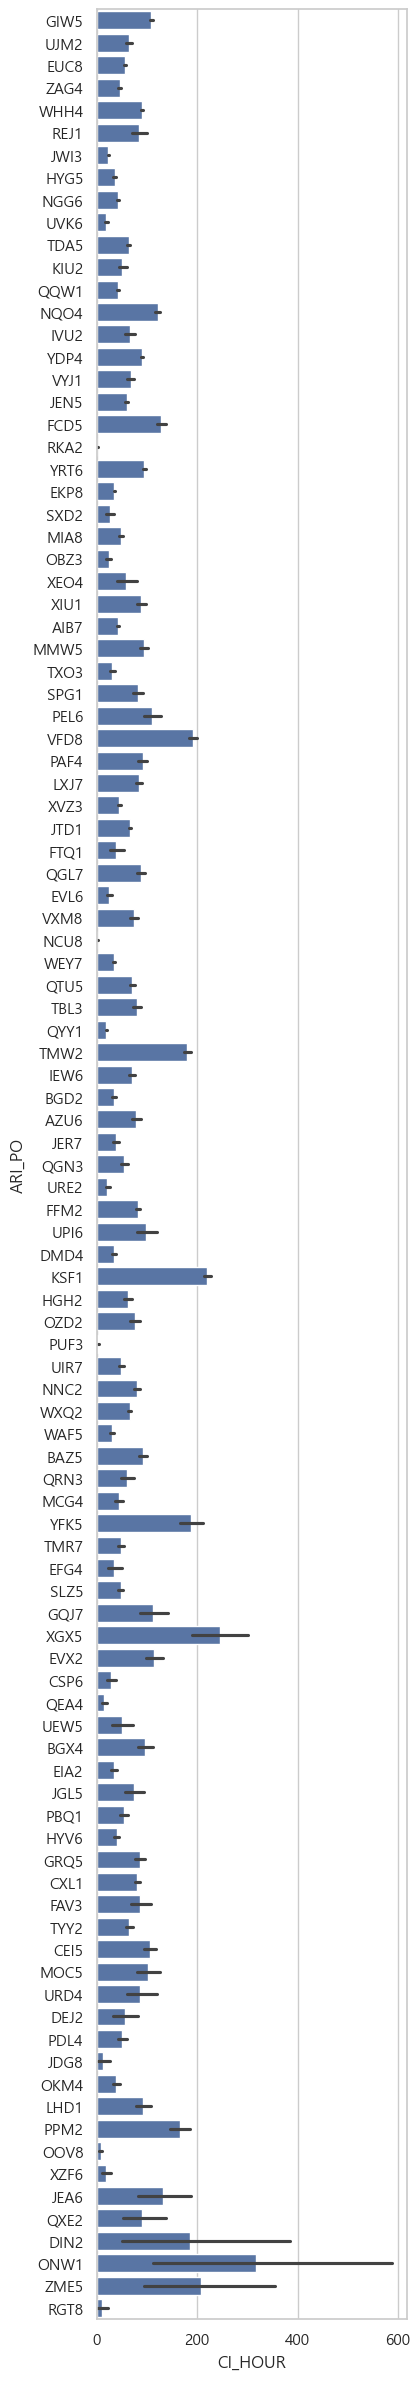

In [98]:
plt.figure(figsize=(4,30))
sns.barplot(x='CI_HOUR',y='ARI_PO',data=df)

<Axes: xlabel='SHIP_TYPE_CATEGORY', ylabel='CI_HOUR'>

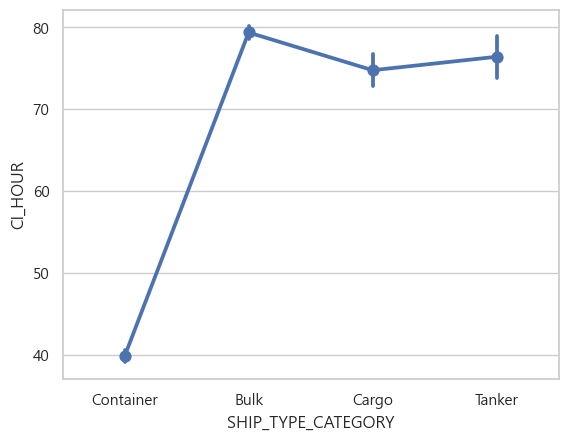

In [84]:
sns.pointplot(x='SHIP_TYPE_CATEGORY',y='CI_HOUR',data=df)

<Axes: xlabel='ARI_CO', ylabel='CI_HOUR'>

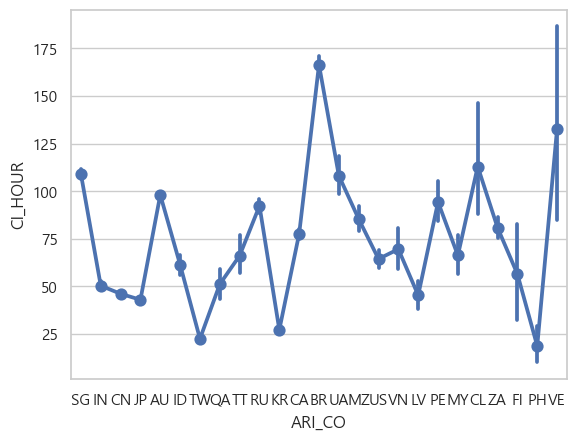

In [85]:
sns.pointplot(x='ARI_CO',y='CI_HOUR',data=df)

<Figure size 400x1500 with 0 Axes>

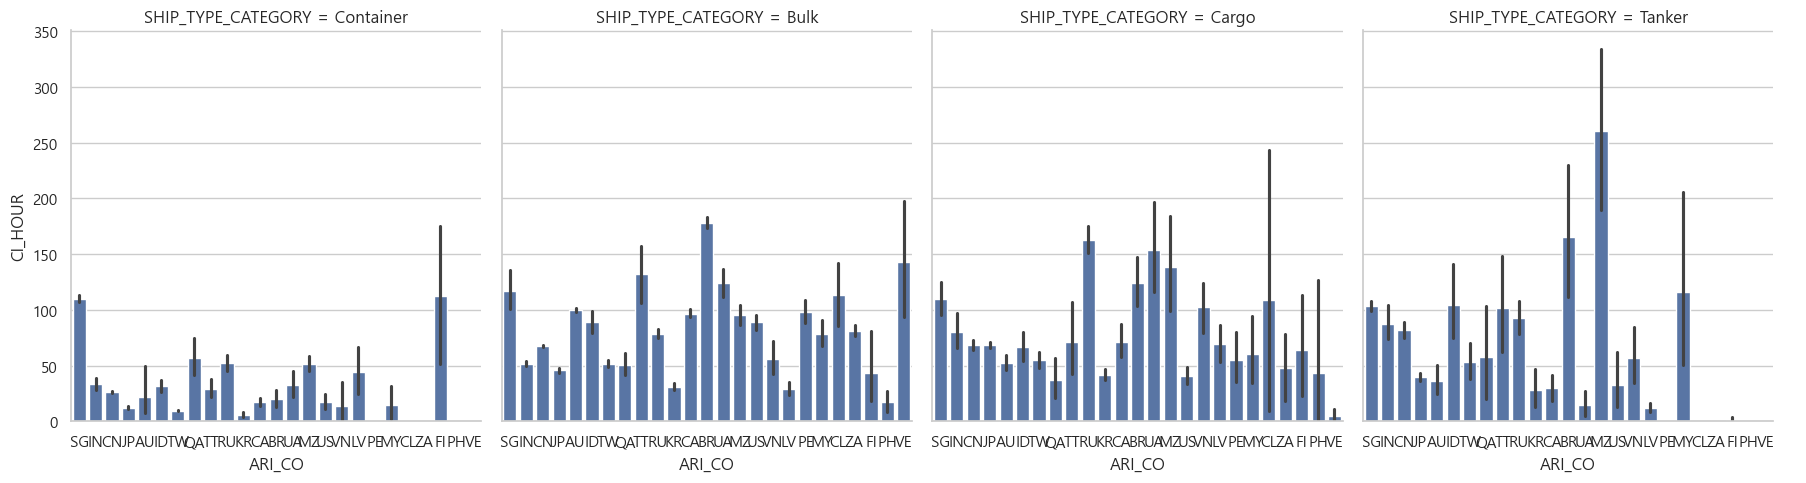

In [105]:
plt.figure(figsize=(4,15))
sns.catplot(
    df, kind="bar",
    x="ARI_CO", y="CI_HOUR", col="SHIP_TYPE_CATEGORY",
    height=5, aspect=.9,
)

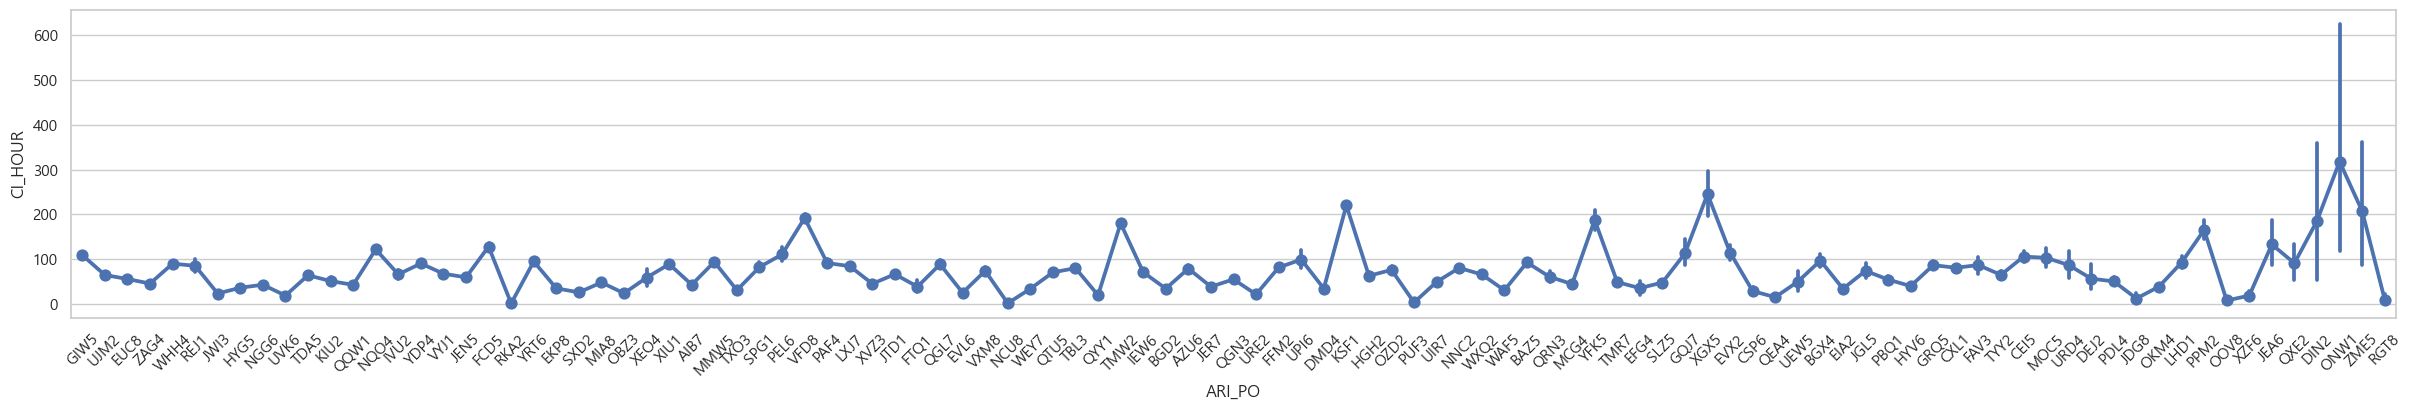

In [90]:
plt.figure(figsize=(30,4))
sns.pointplot(x='ARI_PO',y='CI_HOUR',data=df)
plt.xticks(rotation=45);

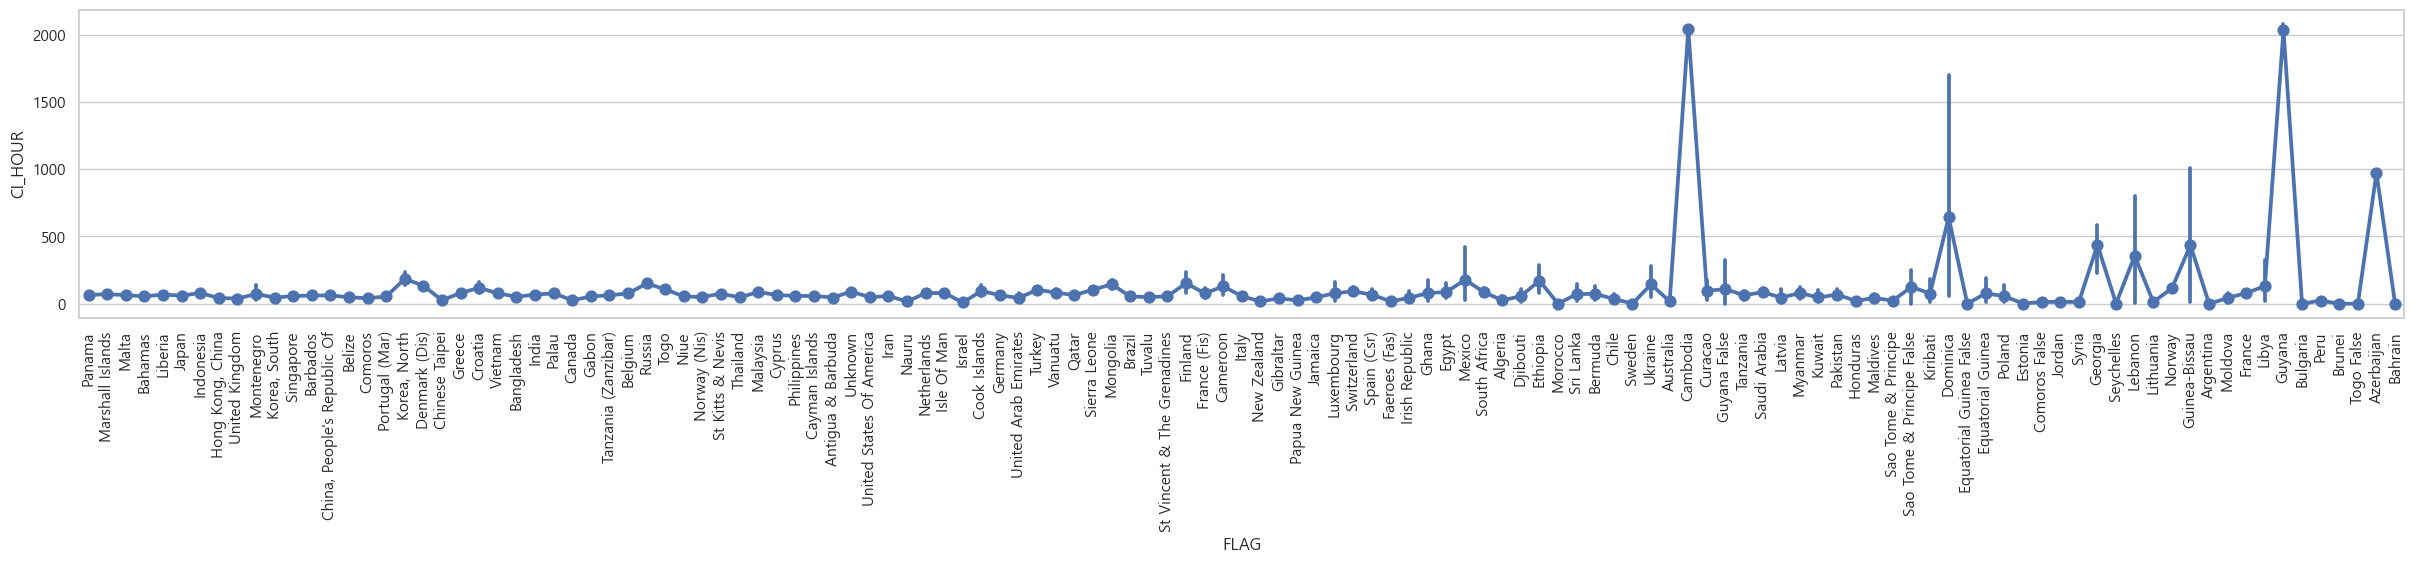

In [96]:
plt.figure(figsize=(30,4))
sns.pointplot(x='FLAG',y='CI_HOUR',data=df,legend=False)
plt.xticks(rotation=90);

# 이산형 변수

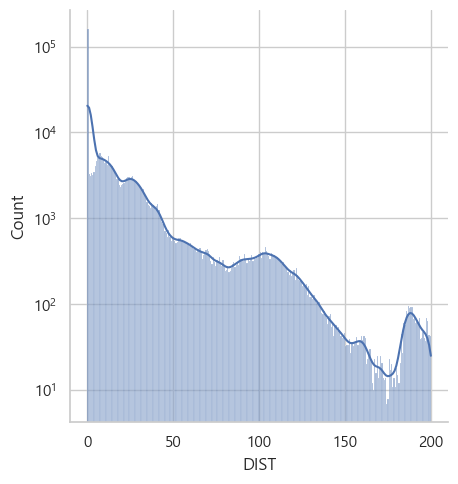

In [40]:
sns.displot(df['DIST'],kde=True)
plt.yscale('log')

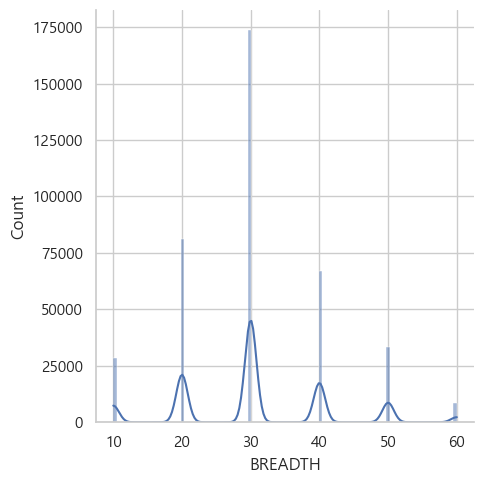

In [42]:
sns.displot(df['BREADTH'],kde=True)
# plt.yscale('log')

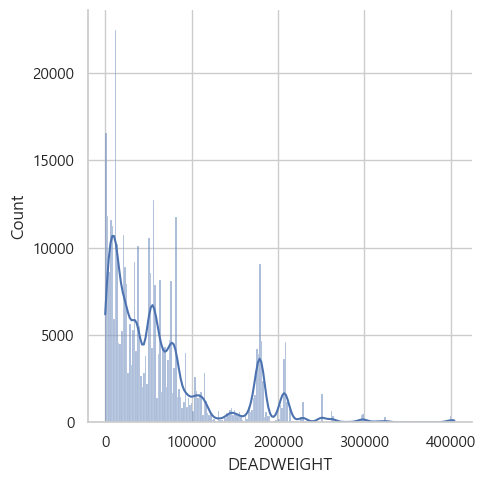

In [37]:
sns.displot(df['DEADWEIGHT'],kde=True)
# plt.xscale('log')

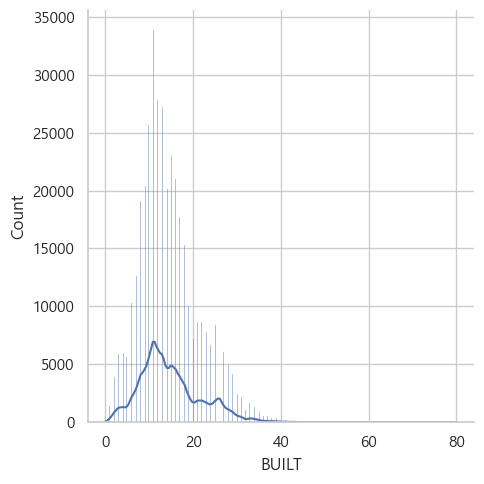

In [36]:
sns.displot(df['BUILT'],kde=True)
# plt.yscale('log')

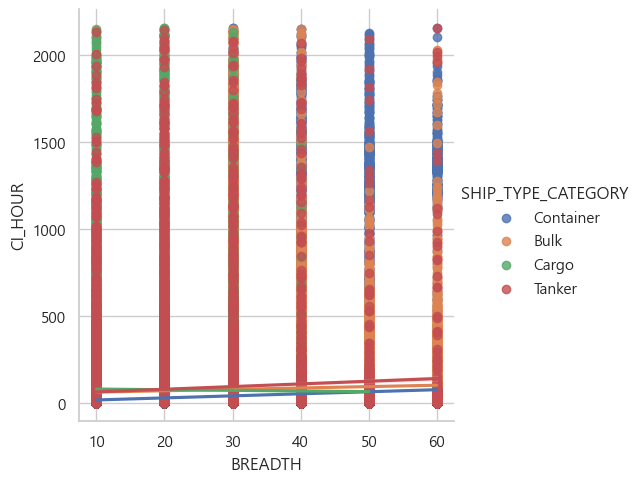

In [107]:
sns.lmplot(data=df, x="BREADTH", y="CI_HOUR", hue="SHIP_TYPE_CATEGORY")

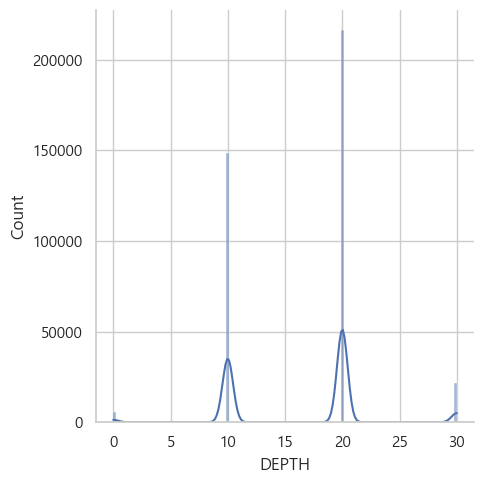

In [35]:
sns.displot(df['DEPTH'],kde=True)

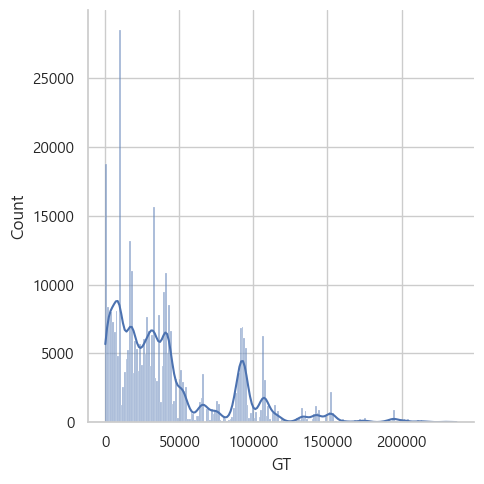

In [33]:
sns.displot(df['GT'],kde=True)


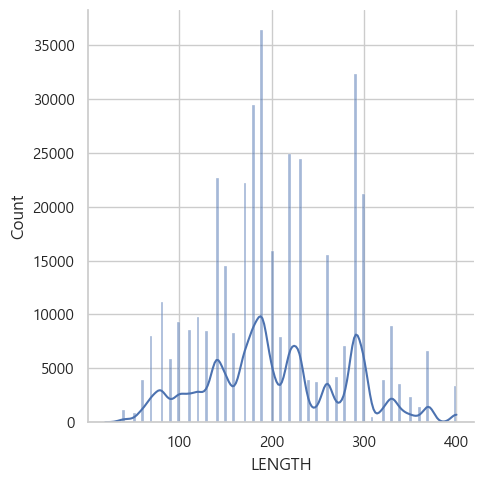

In [32]:
sns.displot(df['LENGTH'],kde=True)

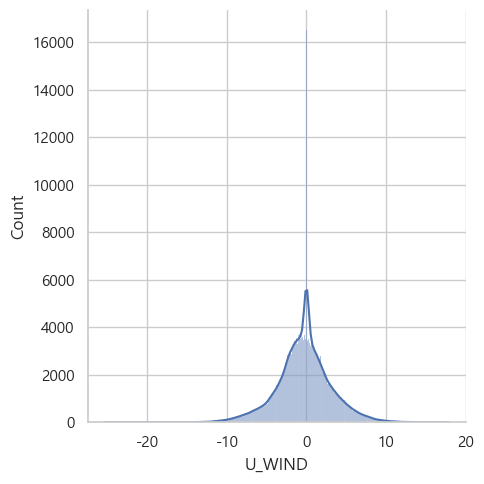

In [31]:
sns.displot(df['U_WIND'],kde=True)

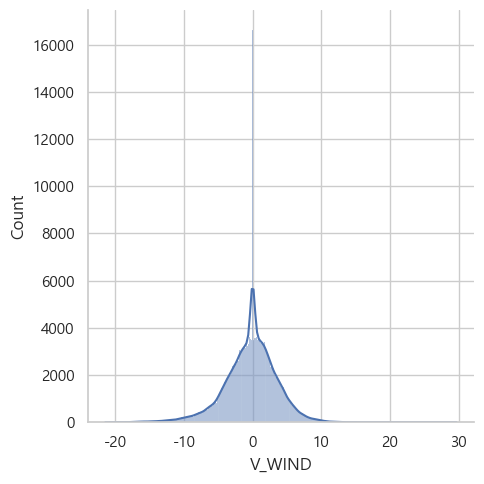

In [30]:
sns.displot(df['V_WIND'],kde=True)

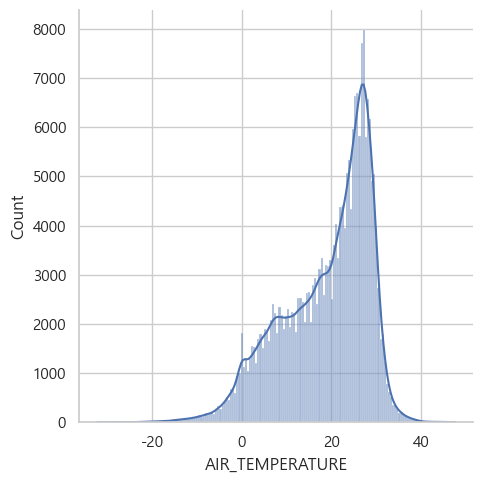

In [29]:
sns.displot(df['AIR_TEMPERATURE'],kde=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391939 entries, 0 to 391938
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ARI_CO              391939 non-null  object 
 1   ARI_PO              391939 non-null  object 
 2   SHIP_TYPE_CATEGORY  391939 non-null  object 
 3   DIST                391939 non-null  float64
 4   ATA                 391939 non-null  object 
 5   ID                  391939 non-null  object 
 6   BREADTH             391938 non-null  float64
 7   BUILT               391939 non-null  int64  
 8   DEADWEIGHT          391939 non-null  int64  
 9   DEPTH               391938 non-null  float64
 10  DRAUGHT             391938 non-null  float64
 11  GT                  391939 non-null  int64  
 12  LENGTH              391938 non-null  float64
 13  SHIPMANAGER         391939 non-null  object 
 14  FLAG                391939 non-null  object 
 15  U_WIND              228251 non-nul

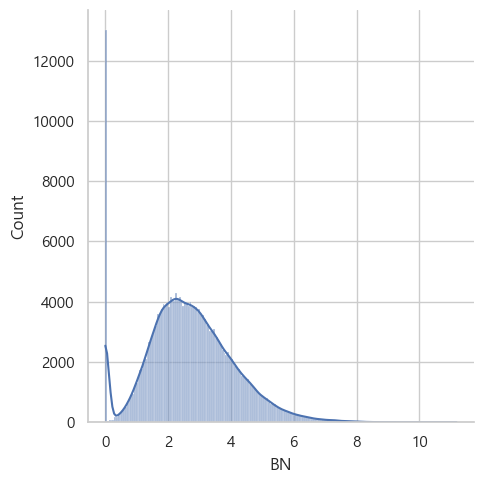

In [43]:
sns.displot(df['BN'],kde=True)

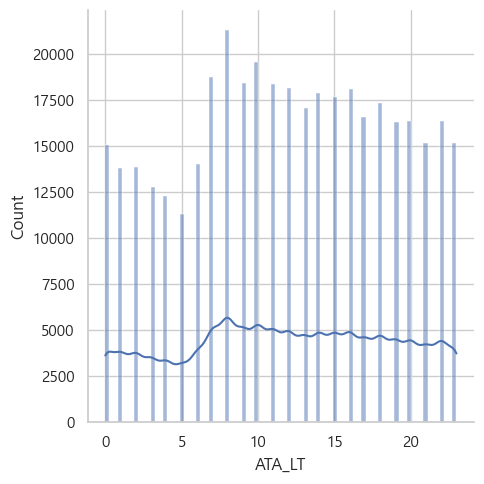

In [44]:
sns.displot(df['ATA_LT'],kde=True)

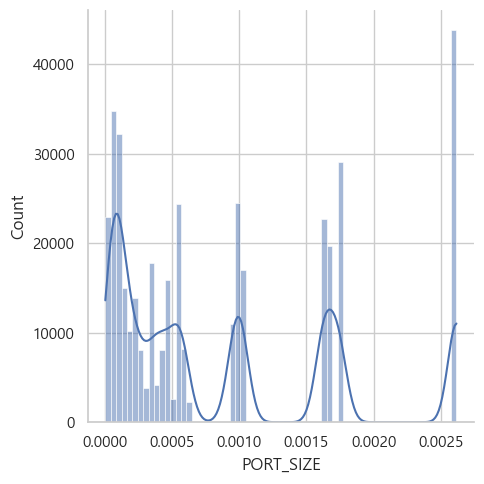

In [45]:
sns.displot(df['PORT_SIZE'],kde=True)

<Axes: xlabel='BREADTH', ylabel='CI_HOUR'>

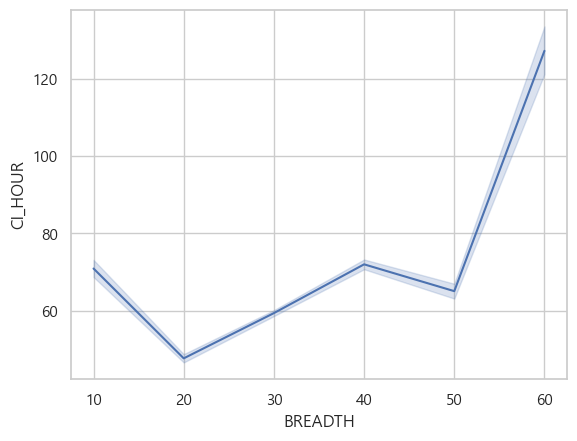

In [17]:
sns.lineplot(x='BREADTH', y='CI_HOUR',data=df)

<Axes: xlabel='DEPTH', ylabel='CI_HOUR'>

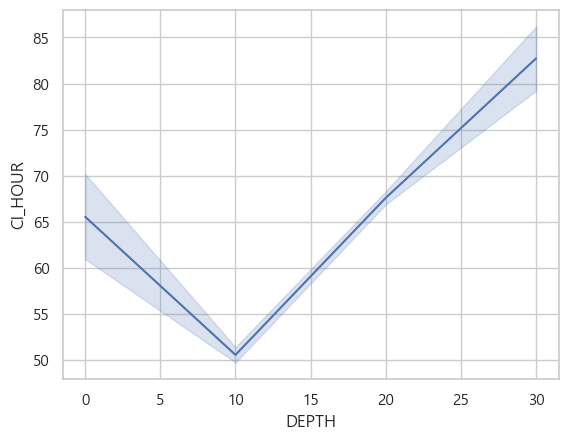

In [18]:
sns.lineplot(x='DEPTH', y='CI_HOUR',data=df)

<Axes: xlabel='DIST', ylabel='CI_HOUR'>

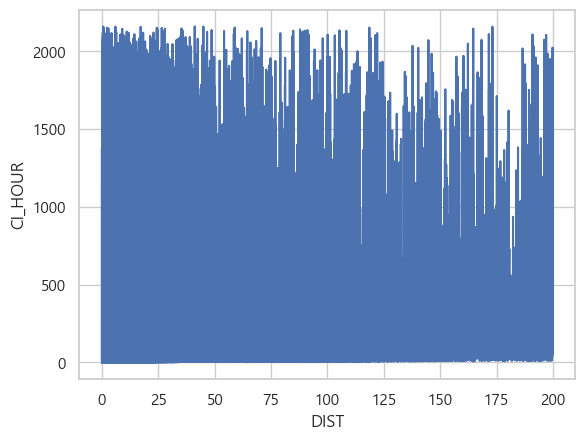

In [46]:
sns.lineplot(x='DIST', y='CI_HOUR',data=df)

<Axes: xlabel='BUILT', ylabel='CI_HOUR'>

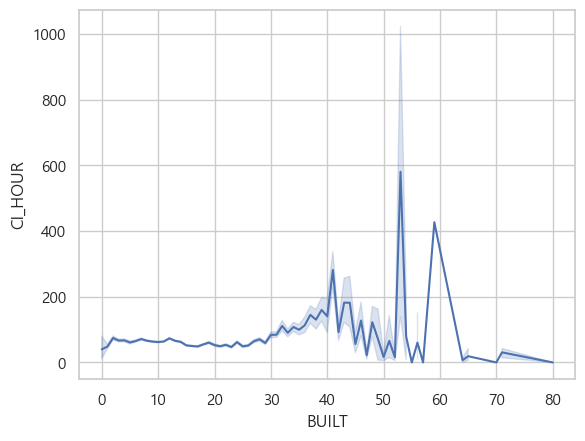

In [47]:
sns.lineplot(x='BUILT', y='CI_HOUR',data=df)

<Axes: xlabel='DEADWEIGHT', ylabel='CI_HOUR'>

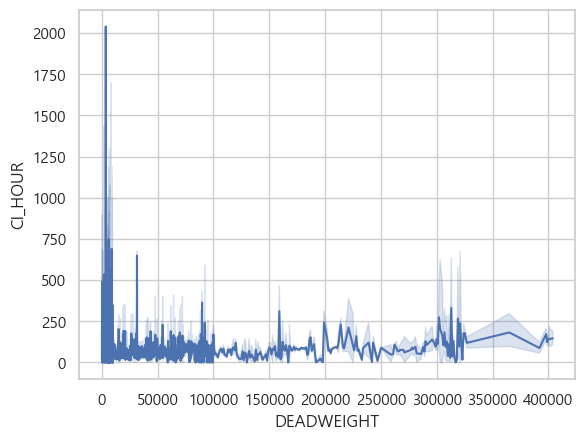

In [48]:
sns.lineplot(x='DEADWEIGHT', y='CI_HOUR',data=df)

<Axes: xlabel='DRAUGHT', ylabel='CI_HOUR'>

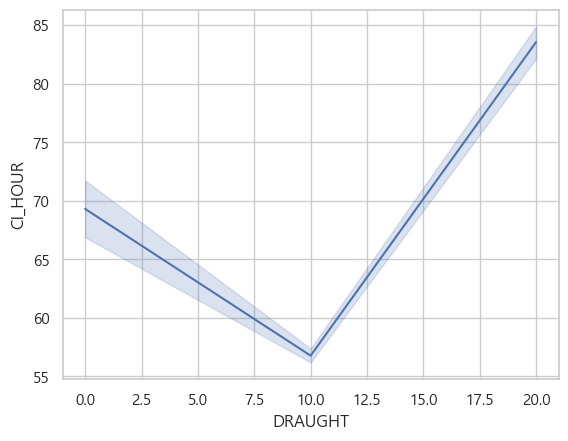

In [49]:
sns.lineplot(x='DRAUGHT', y='CI_HOUR',data=df)

<Axes: xlabel='GT', ylabel='CI_HOUR'>

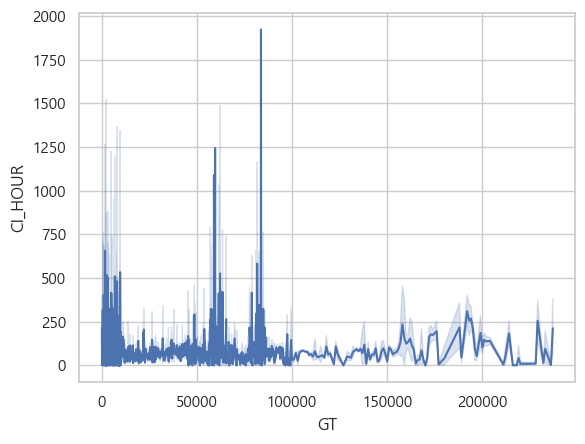

In [50]:
sns.lineplot(x='GT', y='CI_HOUR',data=df)

<Axes: xlabel='LENGTH', ylabel='CI_HOUR'>

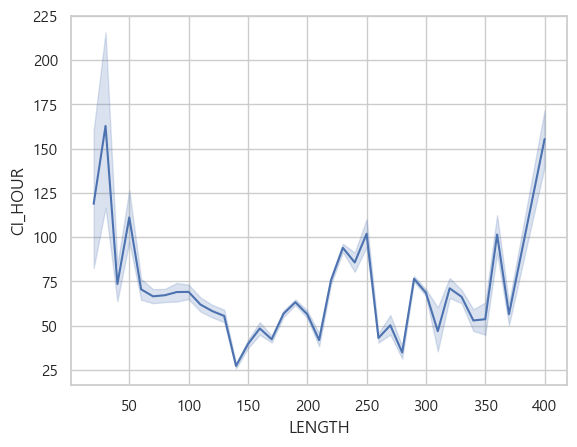

In [51]:
sns.lineplot(x='LENGTH', y='CI_HOUR',data=df)

<Axes: xlabel='U_WIND', ylabel='CI_HOUR'>

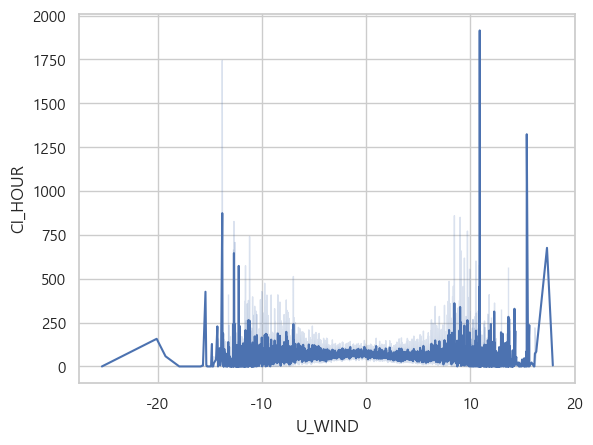

In [52]:
sns.lineplot(x='U_WIND', y='CI_HOUR',data=df)

<Axes: xlabel='V_WIND', ylabel='CI_HOUR'>

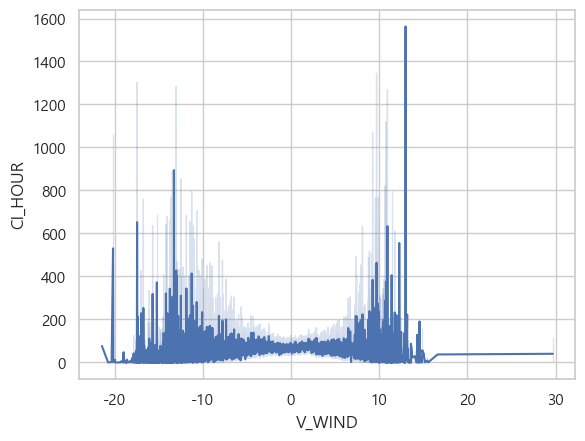

In [53]:
sns.lineplot(x='V_WIND', y='CI_HOUR',data=df)

<Axes: xlabel='AIR_TEMPERATURE', ylabel='CI_HOUR'>

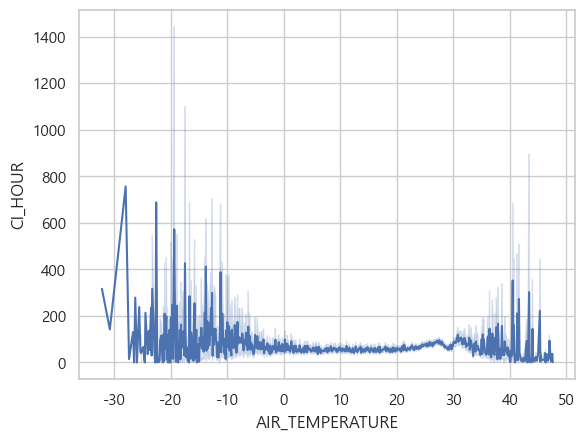

In [54]:
sns.lineplot(x='AIR_TEMPERATURE', y='CI_HOUR',data=df)

KeyboardInterrupt: 

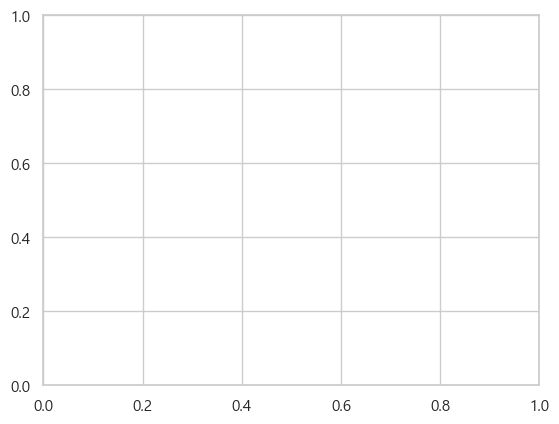

In [55]:
sns.lineplot(x='BN', y='CI_HOUR',data=df)

<Axes: xlabel='ATA_LT', ylabel='CI_HOUR'>

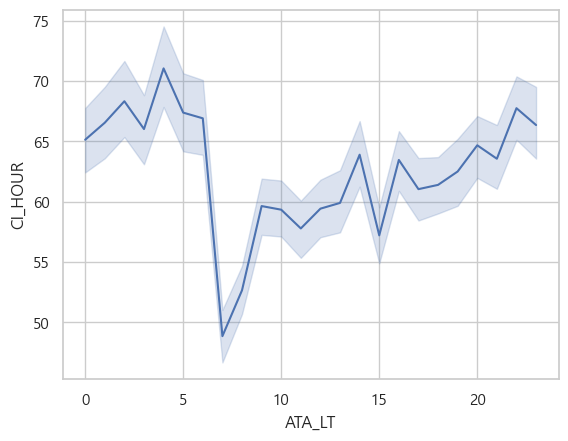

In [56]:
sns.lineplot(x='ATA_LT', y='CI_HOUR',data=df)

<Axes: xlabel='PORT_SIZE', ylabel='CI_HOUR'>

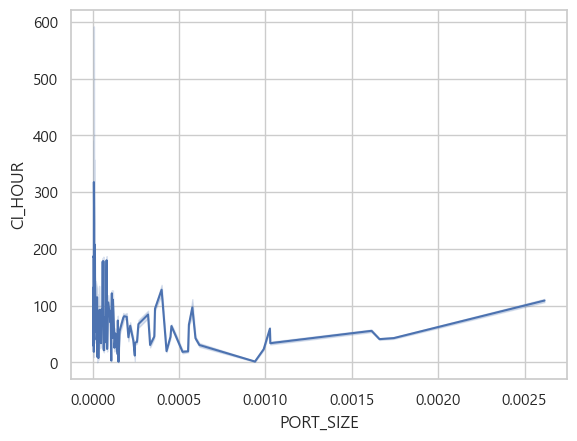

In [57]:
sns.lineplot(x='PORT_SIZE', y='CI_HOUR',data=df)

<Axes: xlabel='DIST', ylabel='CI_HOUR'>

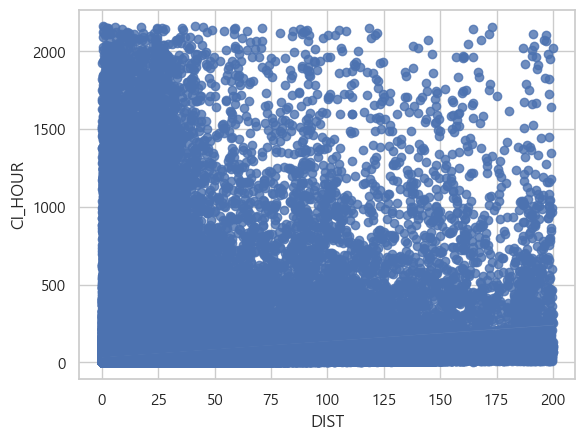

In [59]:
# 꾸미기 옵션
# 99% 신뢰구간으로 늘리면 
sns.regplot(x= 'DIST', y = 'CI_HOUR', data = df)

<Axes: xlabel='BREADTH', ylabel='CI_HOUR'>

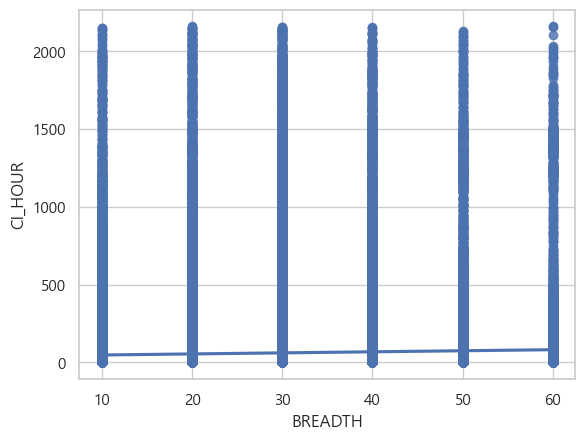

In [60]:
sns.regplot(x= 'BREADTH', y = 'CI_HOUR', data = df)

<Axes: xlabel='BUILT', ylabel='CI_HOUR'>

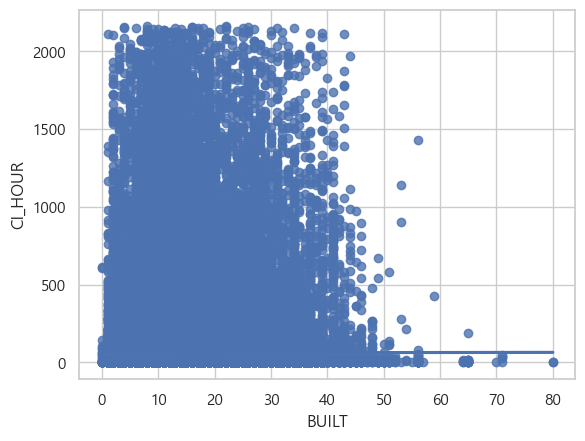

In [61]:
sns.regplot(x= 'BUILT', y = 'CI_HOUR', data = df)

<Axes: xlabel='DEADWEIGHT', ylabel='CI_HOUR'>

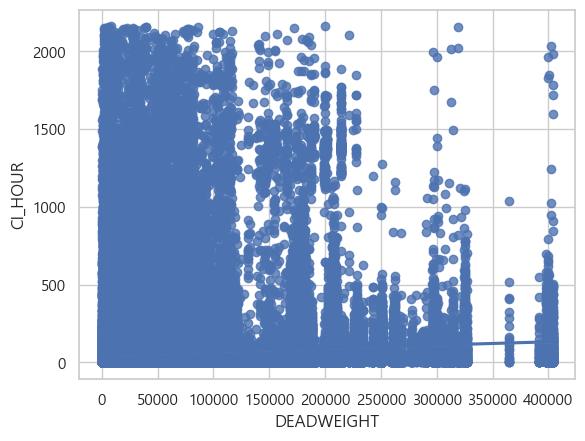

In [62]:
sns.regplot(x= 'DEADWEIGHT', y = 'CI_HOUR', data = df)

<Axes: xlabel='DEPTH', ylabel='CI_HOUR'>

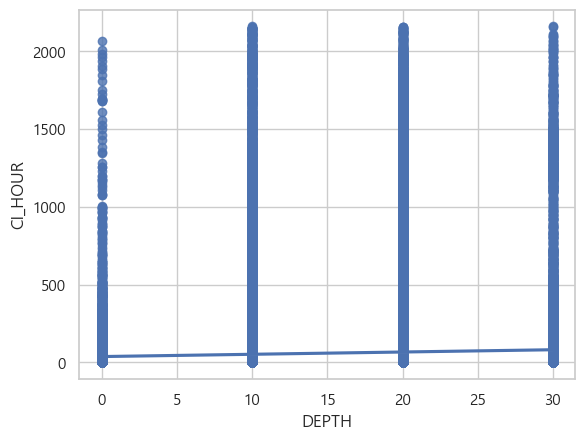

In [63]:
sns.regplot(x= 'DEPTH', y = 'CI_HOUR', data = df)

<Axes: xlabel='DRAUGHT', ylabel='CI_HOUR'>

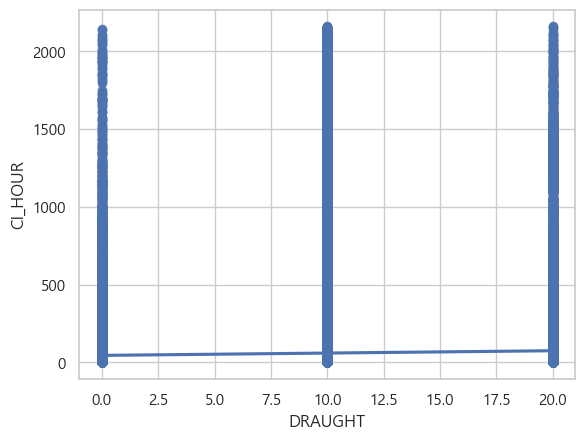

In [64]:
sns.regplot(x= 'DRAUGHT', y = 'CI_HOUR', data = df)

<Axes: xlabel='GT', ylabel='CI_HOUR'>

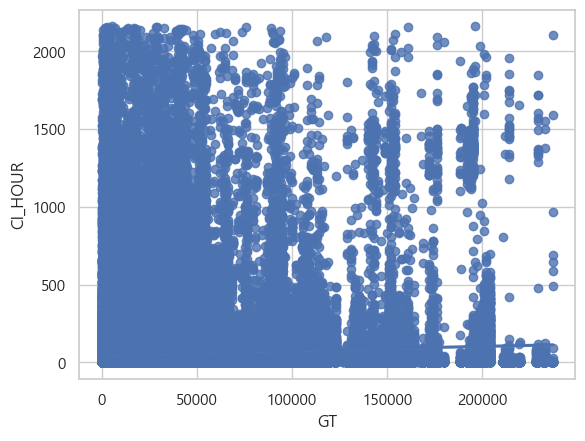

In [65]:
sns.regplot(x= 'GT', y = 'CI_HOUR', data = df)

<Axes: xlabel='LENGTH', ylabel='CI_HOUR'>

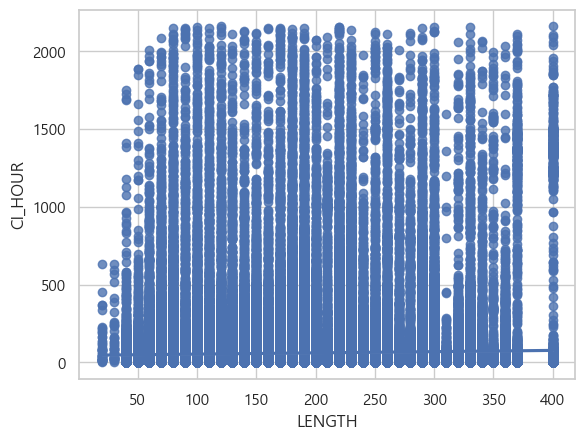

In [66]:
sns.regplot(x= 'LENGTH', y = 'CI_HOUR', data = df)

<Axes: xlabel='U_WIND', ylabel='CI_HOUR'>

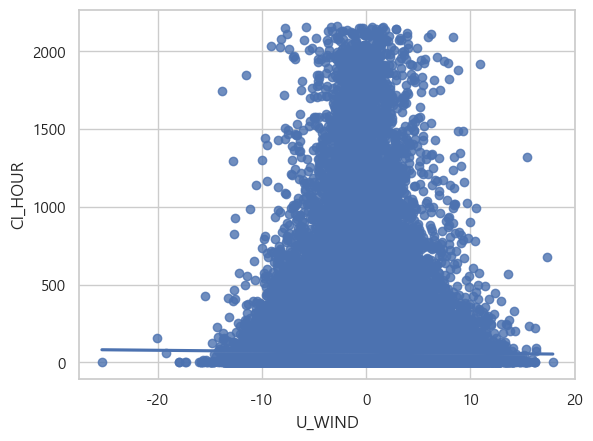

In [67]:
sns.regplot(x= 'U_WIND', y = 'CI_HOUR', data = df)

<Axes: xlabel='V_WIND', ylabel='CI_HOUR'>

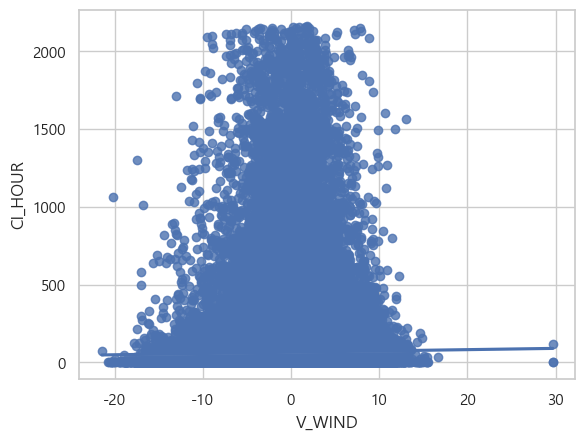

In [68]:
sns.regplot(x= 'V_WIND', y = 'CI_HOUR', data = df)

<Axes: xlabel='AIR_TEMPERATURE', ylabel='CI_HOUR'>

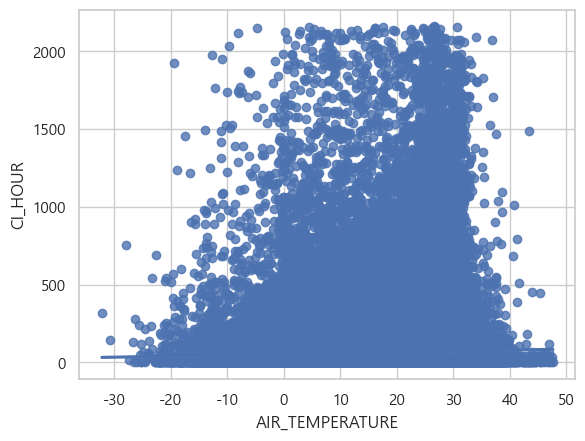

In [69]:
sns.regplot(x= 'AIR_TEMPERATURE', y = 'CI_HOUR', data = df)

<Axes: xlabel='BN', ylabel='CI_HOUR'>

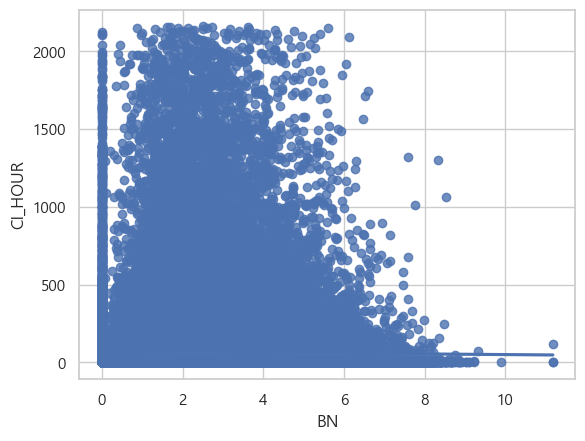

In [70]:
sns.regplot(x= 'BN', y = 'CI_HOUR', data = df)

<Axes: xlabel='ATA_LT', ylabel='CI_HOUR'>

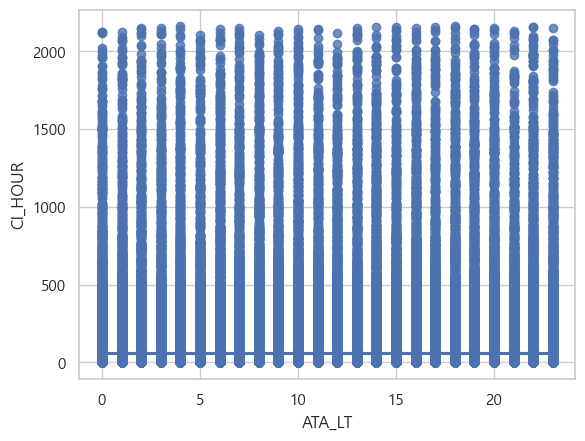

In [71]:
sns.regplot(x= 'ATA_LT', y = 'CI_HOUR', data = df)

<Axes: xlabel='PORT_SIZE', ylabel='CI_HOUR'>

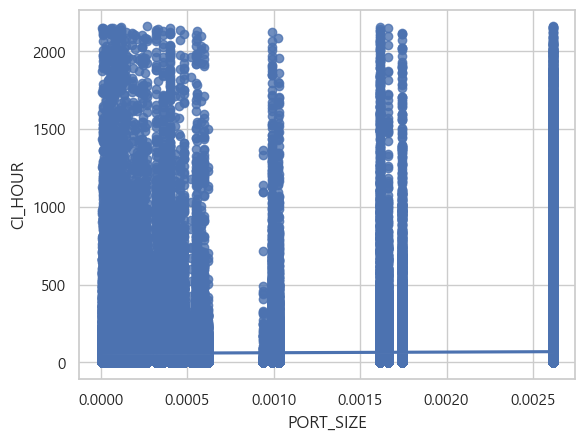

In [72]:
sns.regplot(x= 'PORT_SIZE', y = 'CI_HOUR', data = df)